In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

In [2]:
# ds_block = xr.open_dataset('/scratch/cimes/yh8770/Z_anomaly_climatology.nc')
# ds_block

In [3]:
# ds_block['h_plev_coarse'].mean('month').plot()

In [4]:
df_cyclones = pd.read_csv('/scratch/cimes/xy4043/tracks/tracks_3hrly/xsh24_TempestExtremes_cyclones.csv', header=None)
headline_num = df_cyclones[0][df_cyclones[0].str.contains('start') == True].index

In [5]:
# df_cyclones[0][v+1:]#: headline_num[i+1]]

In [6]:
list_temp = []
for i, v in enumerate(headline_num):
    try:
        x = df_cyclones[0][v+1: headline_num[i+1]].str.split('\t', expand=True)\
            .rename(columns={0:'k1', 1:'k2', 2:'k3', 3:'lon', 4:'lat', 5:'slp', 6:'year', 7:'month', 8:'day', 9:'hour'})
    except IndexError:
        x = df_cyclones[0][v+1: ].str.split('\t', expand=True)\
            .rename(columns={0:'k1', 1:'k2', 2:'k3', 3:'lon', 4:'lat', 5:'slp', 6:'year', 7:'month', 8:'day', 9:'hour'})
    x['track_id'] = i
    list_temp.append(x)

df_cyclones_ken = pd.concat(list_temp)

In [8]:
df_cyclones_ken

,k1,k2,k3,lon,lat,slp,year,month,day,hour,track_id
1,,517,73,161.578125,-67.171875,9.729575e+02,2019,10,20,3,0
2,,521,71,162.828125,-67.796875,9.748540e+02,2019,10,20,6,0
3,,522,69,163.140625,-68.421875,9.770419e+02,2019,10,20,9,0
4,,519,69,162.203125,-68.421875,9.793530e+02,2019,10,20,12,0
5,,517,69,161.578125,-68.421875,9.811339e+02,2019,10,20,15,0
...,...,...,...,...,...,...,...,...,...,...,...
156688,,885,407,276.578125,37.203125,9.965554e+02,2021,1,6,21,14468
156689,,890,413,278.140625,39.078125,9.955384e+02,2021,1,7,0,14468
156691,,213,504,66.578125,67.515625,9.966432e+02,2021,1,6,18,14469
156692,,213,504,66.578125,67.515625,9.970559e+02,2021,1,6,21,14469


In [8]:
# df_cyclones_ken[df_cyclones_ken['month'].astype('int').isin([7, 8, 9, 10, 11])]

In [9]:
projection = ccrs.PlateCarree()#central_longitude=0)
fig, ax = plt.subplots(1, 1,
    figsize=(12, 12), subplot_kw={"projection": projection})

# for iax, data_plot in enumerate([mean_delta, std_delta]):
ax_target = ax
ax_target.set_extent([-180, 180, -90,  90])
ax_target.coastlines()

df_in = df_cyclones_ken[df_cyclones_ken['month'].astype('int').isin([7, 8, 9, 10, 11])]

for flag in df_in['track_id']:#df_cyclones_ken['track_id'].unique():
    # subset_target = df[(df['Flag'] == flag) & (df['time'].dt.month.isin([12, 1, 2]))]
    subset_target = df_in[(df_in['track_id'] == flag)]
    lon = subset_target['lon'].values.astype('float')
    lat = subset_target['lat'].values.astype('float')
    if any(lon > 340) & any(lon < 20):
        lon = np.where(lon < 180, lon+360, lon)
    ax_target.plot(lon, lat, transform=projection)

/home/xy4043/.conda/envs/easy25/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Error in callback <function _draw_all_if_interactive at 0x146b1c4d3920> (for post_execute), with arguments args (),kwargs {}:


URLError: <urlopen error [Errno -2] Name or service not known>

URLError: <urlopen error [Errno -2] Name or service not known>

<Figure size 1200x1200 with 1 Axes>

## Park's blocking

In [5]:
block_path = '/scratch/cimes/mp3238/HACKATHON/xsh24_blocking_freq_ANO_lat30to90N.nc'

In [7]:
ds_block = xr.open_dataset(block_path)
ds_block

<xarray.Dataset> Size: 15GB
Dimensions:         (time: 3560, grid_yt_coarse: 240, grid_xt_coarse: 1440)
Coordinates:
  * time            (time) object 28kB 2019-10-20 03:00:00 ... 2021-01-07 00:...
  * grid_yt_coarse  (grid_yt_coarse) float32 960B 30.12 30.38 ... 89.62 89.88
  * grid_xt_coarse  (grid_xt_coarse) float32 6kB 0.125 0.375 ... 359.6 359.9
    plev            float32 4B ...
    h_plev_coarse   (time, grid_yt_coarse, grid_xt_coarse) float32 5GB ...
Data variables:
    block_freq      (time, grid_yt_coarse, grid_xt_coarse) int32 5GB ...
    z500_anom       (time, grid_yt_coarse, grid_xt_coarse) float32 5GB ...

In [13]:
ds_block['block_freq'].isel(time=10)#.plot()

<xarray.DataArray 'block_freq' (grid_yt_coarse: 240, grid_xt_coarse: 1440)> Size: 1MB
[345600 values with dtype=int32]
Coordinates:
    time            object 8B 2019-10-21 09:00:00
  * grid_yt_coarse  (grid_yt_coarse) float32 960B 30.12 30.38 ... 89.62 89.88
  * grid_xt_coarse  (grid_xt_coarse) float32 6kB 0.125 0.375 ... 359.6 359.9
    plev            float32 4B ...
    h_plev_coarse   (grid_yt_coarse, grid_xt_coarse) float32 1MB ...
Attributes:
    long_name:  Blocking frequency(30-90N) in Xshield24 through anomaly method

In [18]:
block_path = '/scratch/cimes/mp3238/HACKATHON/properties_xsh24_blocking_freq_ANO_lat30to90N.csv'
df = pd.read_csv(block_path)
df

,Flag,Date,Longitude,Latitude,Intensity,Size
0,1,20191020,104.625,52.375,322.18,15054653.56
1,1,20191020,41.125,54.875,326.56,24569410.36
2,1,20191020,41.625,54.875,326.40,24734305.27
3,1,20191020,40.125,55.125,329.07,26002300.60
4,1,20191020,30.125,56.375,328.14,26282879.14
...,...,...,...,...,...,...
3314,71,20201230,186.375,67.125,301.50,2543089.17
3315,71,20201230,186.375,67.375,300.35,2408125.49
3316,71,20201230,186.625,67.625,296.96,2122100.14
3317,71,20201230,186.625,67.625,295.38,2023341.28


In [62]:
df['time'] = pd.to_datetime(df['Date'], format='%Y%m%d')#.dt.str2time()
df

,Flag,Date,Longitude,Latitude,Intensity,Size,time
0,1,20191020,104.625,52.375,322.18,15054653.56,2019-10-20
1,1,20191020,41.125,54.875,326.56,24569410.36,2019-10-20
2,1,20191020,41.625,54.875,326.40,24734305.27,2019-10-20
3,1,20191020,40.125,55.125,329.07,26002300.60,2019-10-20
4,1,20191020,30.125,56.375,328.14,26282879.14,2019-10-20
...,...,...,...,...,...,...,...
3314,71,20201230,186.375,67.125,301.50,2543089.17,2020-12-30
3315,71,20201230,186.375,67.375,300.35,2408125.49,2020-12-30
3316,71,20201230,186.625,67.625,296.96,2122100.14,2020-12-30
3317,71,20201230,186.625,67.625,295.38,2023341.28,2020-12-30


<Axes: >

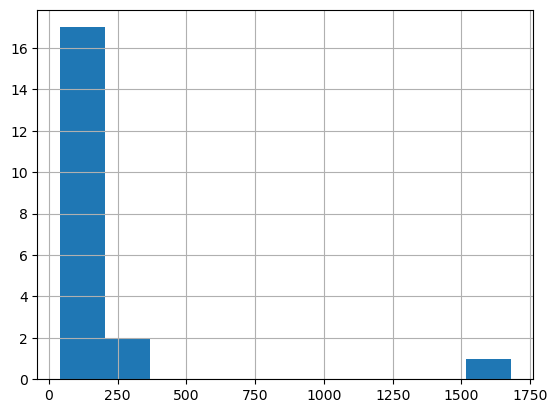

In [65]:
df['Flag'].value_counts().hist()

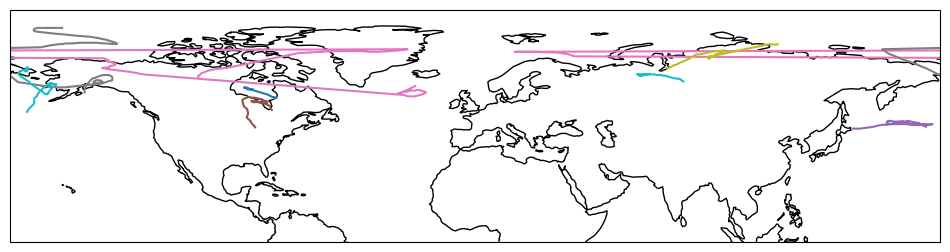

In [66]:
projection = ccrs.PlateCarree(central_longitude=0)
fig, ax = plt.subplots(1, 1,
    figsize=(12, 12), subplot_kw={"projection": projection})

# for iax, data_plot in enumerate([mean_delta, std_delta]):
ax_target = ax
ax_target.set_extent([-180, 180, 0,  90])
ax_target.coastlines()

for flag in df['Flag'].unique():
    subset_target = df[(df['Flag'] == flag) & (df['time'].dt.month.isin([12, 1, 2]))]
    ax_target.plot(subset_target['Longitude'], subset_target['Latitude'], transform=projection)